# IQ Sampling

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculating Power Spectral Density

We must do the following six operations to calculate PSD:

1) Take the FFT of our samples. If we have x samples, the FFT size will be the length of x by default. Let’s use the first 1024 samples as an example to create a 1024-size FFT. The output will be 1024 complex floats.
2) Take the magnitude of the FFT output, which provides us 1024 real floats.
3) Square the resulting magnitude to get power.
4) Normalize: divide by the FFT size (N) and sample rate (Fs).
5) Convert to dB using 10 \log_{10}(); we always view PSDs in log scale.
6) Perform an FFT shift, covered in the previous chapter, to move “0 Hz” in the center and negative frequencies to the left of center.

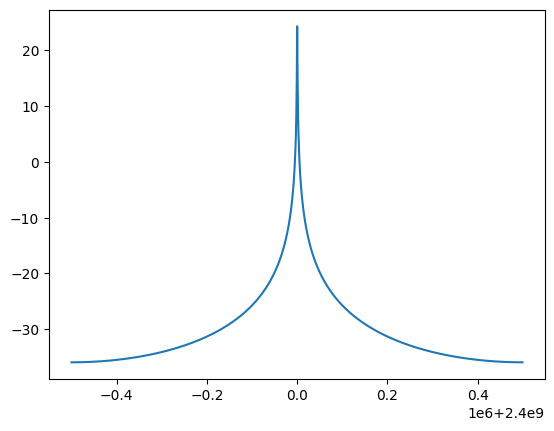

In [19]:
Fs = 1e6 # lets say we sampled at 1 MHz
# assume x contains your array of IQ samples
N = 1024
x = np.arange(0,N) # we will only take the FFT of the first 1024 samples, see text below
# x = x * np.hamming(len(x)) # apply a Hamming window
PSD = np.abs(np.fft.fft(x))**2 / (N*Fs)
PSD_log = 10.0*np.log10(PSD)
PSD_shifted = np.fft.fftshift(PSD_log)

center_freq = 2.4e9 # frequency we tuned our SDR to
f = np.arange(Fs/-2.0, Fs/2.0, Fs/N) # start, stop, step.  centered around 0 Hz
f += center_freq # now add center frequency
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.plot(f, PSD_shifted)
plt.show()

If you want to find the PSD of millions of samples, don’t do a million-point FFT because it will probably take forever. It will give you an output of a million “frequency bins”, after all, which is too much to show in a plot. Instead I suggest doing multiple smaller PSDs and averaging them together or displaying them using a spectrogram plot. Alternatively, if you know your signal is not changing fast, it’s adequate to use a few thousand samples and find the PSD of those; within that time-frame of a few thousand samples you will likely capture enough of the signal to get a nice representation.

Here is a full code example that includes generating a signal (complex exponential at 50 Hz) and noise. Note that N, the number of samples to simulate, becomes the FFT length because we take the FFT of the entire simulated signal.

/Users/eddie/Coding/PySDR/.venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


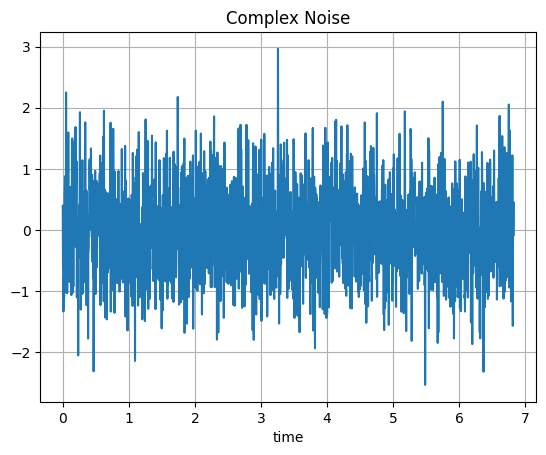

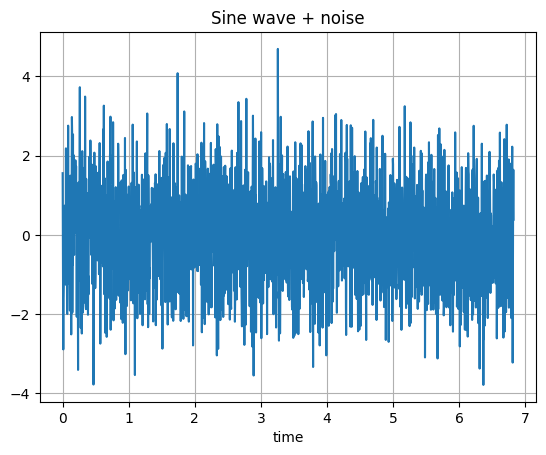

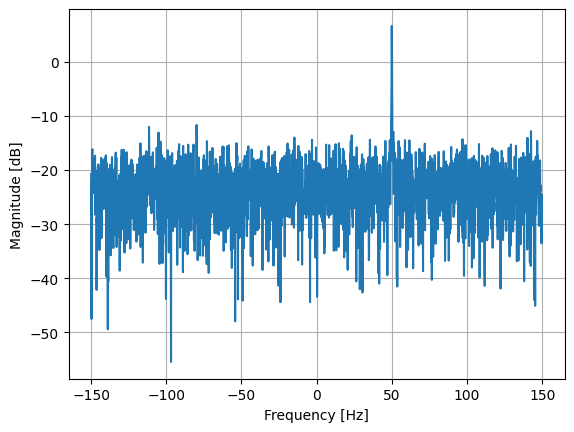

In [20]:
Fs = 300 # sample rate
Ts = 1/Fs # sample period
N = 2048 # number of samples to simulate

t = Ts*np.arange(N)
x = np.exp(1j*2*np.pi*50*t) # simulates sinusoid at 50 Hz
n = (np.random.randn(N) + 1j*np.random.randn(N))/np.sqrt(2) # complex noise with unity power
plt.plot(t, n)
plt.title("Complex Noise")
plt.xlabel("time")
plt.grid(True)
plt.show()
noise_power = 2
r = x + n * np.sqrt(noise_power)
plt.plot(t, r)
plt.title("Sine wave + noise")
plt.xlabel("time")
plt.grid(True)
plt.show()
PSD = np.abs(np.fft.fft(r))**2 / (N*Fs)
PSD_log = 10.0*np.log10(PSD)
PSD_shifted = np.fft.fftshift(PSD_log)

f = np.arange(Fs/-2.0, Fs/2.0, Fs/N) # start, stop, step

plt.plot(f, PSD_shifted)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.grid(True)
plt.show()